# PREDICCION DE LA DIABETES EN LA POBLACIÓN FEMENINA DE LOS INDIOS PIMA

Los pima (o akimel o'odham, también deletreado akimel o'otham, "gente del río", antes conocido como pima) son un grupo de nativos americanos que viven en un área que consiste en lo que ahora es el centro y el sur de Arizona. 

La población mayoritaria de las dos bandas supervivientes de los akimel o'odham se asienta en dos reservas: los keli akimel o'otham en la Comunidad India del Río Gila (GRIC) y los on'k akimel o'odham en la Comunidad India Pima-Maricopa del Río Salado (SRPMIC)".

Referente a la salud los pimas consideran la intervención divina como causa de la aparición o curación de la enfermedad, por lo que continuamente hacen votos y mandas a San Francisco (patrono de los pimas) para pedir salud.

También recurren a curanderos y parteras para curarse con hierbas medicinales (hierba inmortal y pezuña de vaca para el empacho, aliso y manzanilla para los dolores de parto, ocotillo, ajo, canela y ruda para los sustos, cola de caballo para el “mal de orín”, torote prieto para picaduras de alacrán, etc.)

Cuando la enfermedad persiste o es grave, acuden a pequeños centros médicos rurales que existen en la región (en Maycoba y el Kipor, bajo la responsabilidad de la Secretaría de Salud del Estado). En los últimos años viajan a los grandes centros de población como Ciudad Obregón y Hermosillo.

Los Pima presentan problemas de enfermedades bronco-respiratorias, diarreas, parásitos intestinales y anemia, principalmente en la población infantil. Existe baja mortalidad infantil y es raro que el promedio de vida supere los 60 años, predominando en un alto porcentaje la población menor a los 19 años.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. 

La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones. En particular, todos los pacientes son mujeres de al menos 21 años de edad de origen indio Pima.

# Diabetes

La diabetes es una enfermedad que se produce cuando la glucosa en sangre, también llamada azúcar en sangre, es demasiado alta. La glucosa en sangre es la principal fuente de energía y procede de los alimentos que se ingieren. La insulina, una hormona producida por el páncreas, ayuda a que la glucosa de los alimentos llegue a las células para ser utilizada como energía. A veces, el cuerpo no produce suficiente insulina, o no la utiliza bien. La glucosa se queda en la sangre y no llega a las células.

Con el tiempo, tener demasiada glucosa en la sangre puede causar problemas de salud. Aunque la diabetes no tiene cura, puedes tomar medidas para controlarla y mantenerte sano.

¿Cuáles son los distintos tipos de diabetes? Los tipos más comunes de diabetes son el tipo 1, el tipo 2 y la diabetes gestacional.

1. Diabetes de tipo 1: Si tiene diabetes de tipo 1, su cuerpo no produce insulina.
Su sistema inmunitario ataca y destruye las células del páncreas que producen la insulina. La diabetes de tipo 1 suele diagnosticarse en niños y adultos jóvenes, aunque puede aparecer a cualquier edad. Las personas con diabetes de tipo 1 necesitan administrarse insulina todos los días para mantenerse con vida.

2. Diabetes de tipo 2: Si tiene diabetes de tipo 2, su cuerpo no fabrica ni utiliza de forma correcta la insulina. La diabetes de tipo 2 puede aparecer a cualquier edad, incluso durante la infancia. Sin embargo, este tipo de diabetes se da con mayor frecuencia en personas de mediana edad y mayores. El tipo 2 es el más común de los tipos de diabetes.

3. Diabetes gestacional La diabetes gestacional se desarrolla en algunas mujeres cuando están embarazadas. La mayoría de las veces, este tipo de diabetes desaparece después del nacimiento del bebé. Sin embargo, si has tenido diabetes gestacional, tienes más posibilidades de desarrollar diabetes de tipo 2 más adelante. A veces, la diabetes diagnosticada durante el embarazo es en realidad una diabetes de tipo 2.

Otros tipos de diabetes Los tipos menos comunes son la diabetes monogénica, que es una forma hereditaria de diabetes, y la diabetes relacionada con la fibrosis quística .

# EDA

## Carga de las librerias


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

import warnings
warnings.filterwarnings('ignore') 


## Carga de los datos

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/01_Oriol/01_Machine Learning/00_PROYECTOS/04_Proyectos_Machine Learning/Diabetes Pima Indians/diabetes.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


El conjunto de datos proporciona la información de las pacientes. Incluye 768 registros y 8 atributos mas la variable objetivo. Cada atributo es un factor de riesgo potencial.

El conjunto de datos consta de varias variables médicas predictoras (independientes) y una variable objetivo (dependiente), el resultado. Las variables independientes incluyen:

1- Embarazos: número de embarazos

2- Glucosa: concentración de glucosa en plasma durante 2 horas en una prueba de tolerancia a la glucosa oral

3- Presión arterial : presión arterial diastólica (mm Hg)

4- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)

5- Insulina: insulina sérica de 2 horas (mu U / ml)

6- IMC: índice de masa corporal (peso en kg / (altura en m) 2)

7- DiabetesPedigreeFunction: función del pedigrí de la diabetes (una función que puntúa la probabilidad de diabetes según los antecedentes familiares)

8- Edad: Edad (años)

9- Resultado: variable de clase (0 si no es diabético, 1 si es diabético)

## Distribución de la variable objetivo

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Analizando la variable objetivo observamos que disponemos de un dataset desbalanceado, ya que tan solo disponemos de 268 casos con diabetes y 500 casos sin diabetes

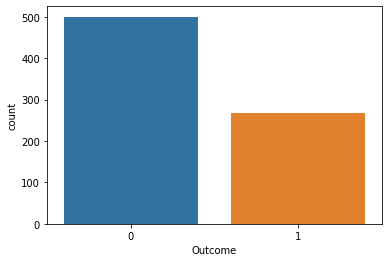

In [9]:
sns.countplot(data['Outcome'], label= 'count')

## Datos Faltantes

A la hora de analizar el head() del dataset se puede observar que algunos registros contienen 0 en alguna de sus características. Este hecho nos indica que que son datos faltantes ya que un 0 no tendría sentido en los atributos de este proyecto.

In [10]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'El porcentaje total de datos faltantes es del {round(total_percentage,2)}%')

El porcentaje total de datos faltantes es del 84.9%


In [12]:
# Porcentaje de datos faltantes por categoría

total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042


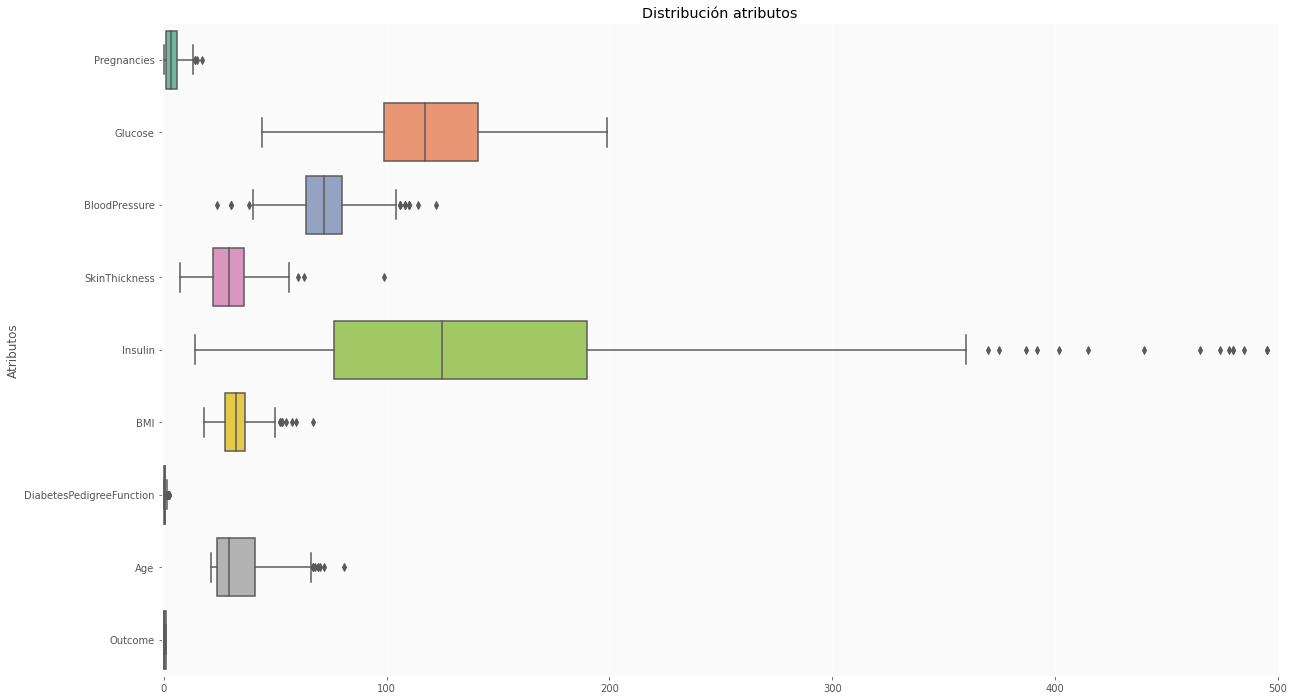

In [13]:
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(20, 12))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-1, 500))
plt.ylabel('Atributos')
plt.title("Distribución atributos")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

Podemos observar que todos los valores faltantes se han transformado en valores NaN.

Se procede a instalar la librería 'verstack' con el objetivo de poder rellenar los NaN por valores nuevos según correlación entre las características mediante la aplicación de un modelo XGBoost.

In [14]:
pip install verstack

  Created wheel for verstack: filename=verstack-0.3.1-cp37-none-any.whl size=14342 sha256=8ae0c94577ebe3aa6f1bfcacb11c59b5bf665665969a58428defb3a3eafe236f
  Stored in directory: /root/.cache/pip/wheels/15/1b/58/10e59516150cea4d9b1dbacceb3bffcc0cfd2d166efabec2f6
Successfully built verstack


In [15]:
from verstack import NaNImputer
imputer = NaNImputer()
new_data = imputer.impute(data)



Dataset dimensions:
 - rows:         768
 - columns:      9
 - mb in memory: 0.05
 - NaN cols num: 5
--------------------------

Deploy multiprocessing with 2 parallel proceses

- Glucose:                       imputed 5 NaNs
- SkinThickness:                 imputed 227 NaNs
- BloodPressure:                 imputed 35 NaNs
- BMI:                           imputed 11 NaNs
- Insulin:                       imputed 374 NaNs

NaNs imputation time: 0.88 minutes
--------------------------------------------------


In [16]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,171.328751,33.6,0.627,50,1
1,1,85.0,66.0,29.0,59.483383,26.6,0.351,31,0
2,8,183.0,64.0,33.0,197.233948,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [17]:
# Comprobamos que se ha realizado correctamente la asignación de valores faltantes

missing_data = new_data.isnull().sum()
total_percentage = (missing_data.sum()/new_data.shape[0]) * 100
print(f'El porcentaje total de datos faltantes es del {round(total_percentage,2)}%')

El porcentaje total de datos faltantes es del 0.0%


## Distribución de las variables

In [18]:
new_data_diabetes = new_data[new_data['Outcome'] == 1]
new_data_no_diabetes = new_data[new_data['Outcome'] == 0]

### Diabetes y Glucosa en sangre

Text(0.5, 0, 'Glucosa')

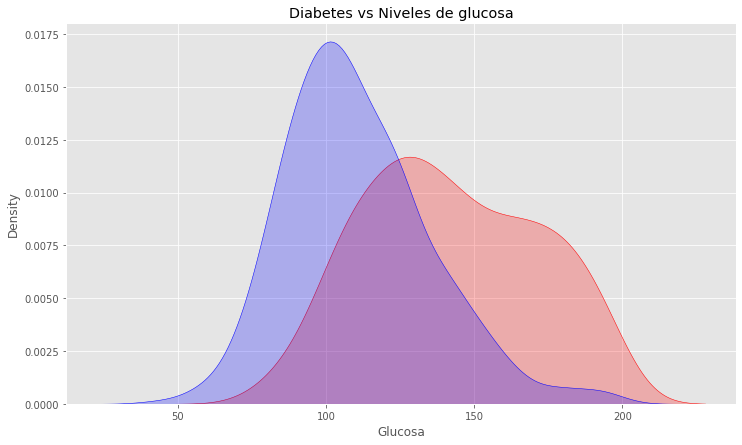

In [19]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['Glucose'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['Glucose'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs Niveles de glucosa')
plt.xlabel('Glucosa')

El nivel de glucosa para un adulto normal es de alrededor de 120-130mg/dl, cualquier cosa por encima de esto significa que la persona probablemente está sufriendo de prediabetes y diabetes.

En el gráfico anterior podemos ver que las personas sanas tienen un nivel de glucosa de 120 mg/dl, pero que va disminuyendo gradualmente, mientras que en el caso de las personas diabéticas ocurre lo contrario

### Diabetes y embarazos

Text(0.5, 0, 'embarazos')

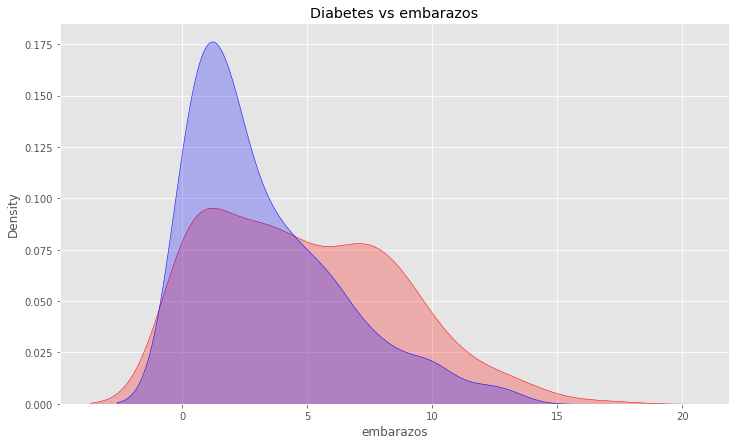

In [20]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['Pregnancies'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['Pregnancies'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs embarazos')
plt.xlabel('embarazos')

Se observa una distribución uniforme entre los dos grupos con frecuencias diferentes. En este sentido se puede afirmar que los embarazos no son la causa de la aparción de la enfermedad de diabetes

### Diabetes y presión sanguinea

Text(0.5, 0, 'Presión sanguinea')

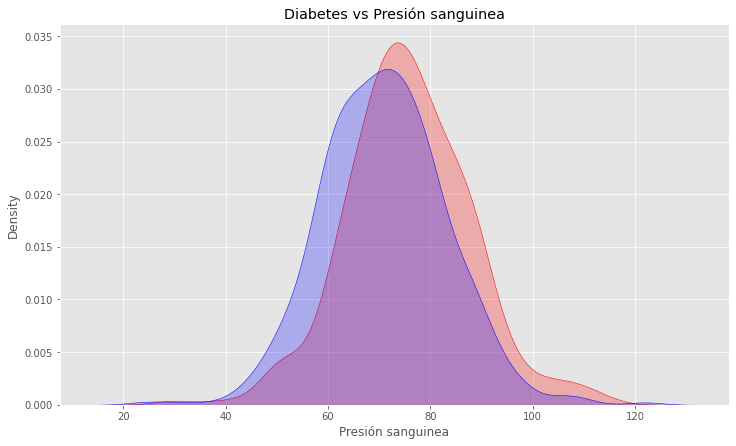

In [21]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['BloodPressure'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['BloodPressure'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs Presión sanguinea')
plt.xlabel('Presión sanguinea')

La presión arterial alta (también conocida como "hipertensión") es muy común en personas con diabetes. De hecho, las dos afecciones suelen ir de la mano porque ambas pueden ser consecuencia de los mismos factores de estilo de vida.

La diabetes daña las arterias y las convierte en objetivos de endurecimiento, lo que se denomina aterosclerosis. Esto puede provocar una presión arterial alta que, si no se trata, puede causar problemas como daños en los vasos sanguíneos, infarto de miocardio e insuficiencia renal.

Para una persona normal la PA debe estar en o por debajo de 120/80 mm Hg, la persona con hipertensión puede estar por encima de 139/89 mm Hg.

Del gráfico anterior, podemos decir que, los diabéticos y las personas sanas se distribuyen uniformemente con PA baja y normal pero, hay menos personas sanas que tienen PA alta.


### Diabetes y pliegue piel

Text(0.5, 0, 'pliegue de la piel en triceps (mm)')

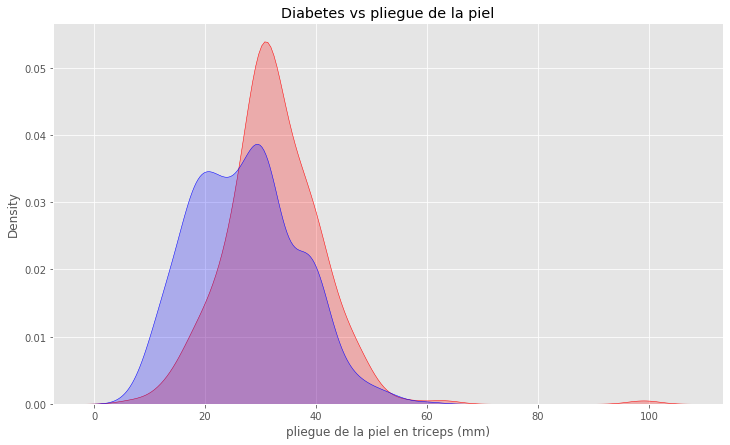

In [22]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['SkinThickness'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['SkinThickness'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs pliegue de la piel')
plt.xlabel('pliegue de la piel en triceps (mm)')

Los cambios en los vasos sanguíneos debidos a la diabetes pueden provocar una afección cutánea denominada dermopatía diabética. La dermopatía aparece en forma de manchas escamosas de color marrón claro o rojo, a menudo en la parte delantera de las piernas. Las manchas no duelen, no tienen ampollas ni pican, y generalmente no es necesario un tratamiento.

En el gráfico anterior, la distribución entre personas sanas y diabéticas es más o menos la misma en cuanto al grosor de la piel.


### Diabetes e insulina

Text(0.5, 0, 'Nivel de insulina en sangre')

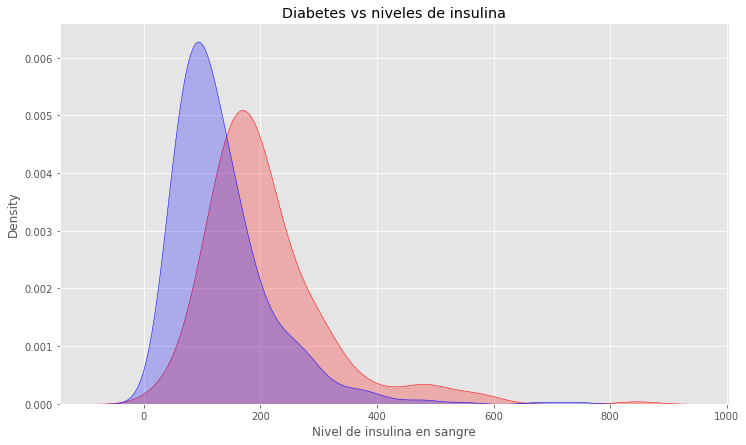

In [23]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['Insulin'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['Insulin'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs niveles de insulina')
plt.xlabel('Nivel de insulina en sangre')

La insulina es una hormona que produce el páncreas para que las células puedan utilizar la glucosa. Cuando el cuerpo no produce o utiliza la insulina correctamente, se puede tomar insulina artificial para ayudar a controlar el azúcar en sangre. Se pueden utilizar muchos tipos para tratar la diabetes.

La insulina ayuda a controlar los niveles de glucosa en sangre indicando al hígado y a las células musculares y grasas que tomen la glucosa de la sangre. Por lo tanto, la insulina ayuda a las células a tomar la glucosa para utilizarla como energía. Si el cuerpo tiene suficiente energía, la insulina indica al hígado que tome la glucosa y la almacene como glucógeno.

De la gráfica anterior, podemos ver que hay personas diabéticas que aumentan a medida que los niveles de insulina aumentan gradualmente. Hay más personas sanas en torno a los niveles de insulina 0-100.

### Diabetes y IMC

Text(0.5, 0, 'IMC')

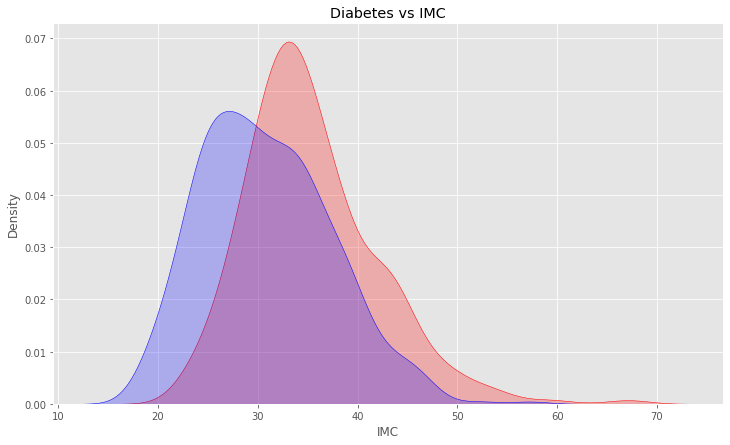

In [24]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['BMI'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['BMI'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs IMC')
plt.xlabel('IMC')

El sobrepeso (IMC de 25-29,9), o la obesidad (IMC de 30-39,9) o la obesidad mórbida (IMC de 40 o más), aumentan considerablemente el riesgo de desarrollar diabetes de tipo 2. Cuanto más exceso de peso tengas, más resistentes se vuelven las células de tus músculos y tejidos a tu propia hormona de la insulina.

De la gráfica anterior podemos determinar que, a medida que aumenta el IMC disminuye la probabilidad de ser saludable y aumenta la de ser diabético.

### Diabetes función de tipo

Text(0.5, 0, 'Diabetes Pedigree Function')

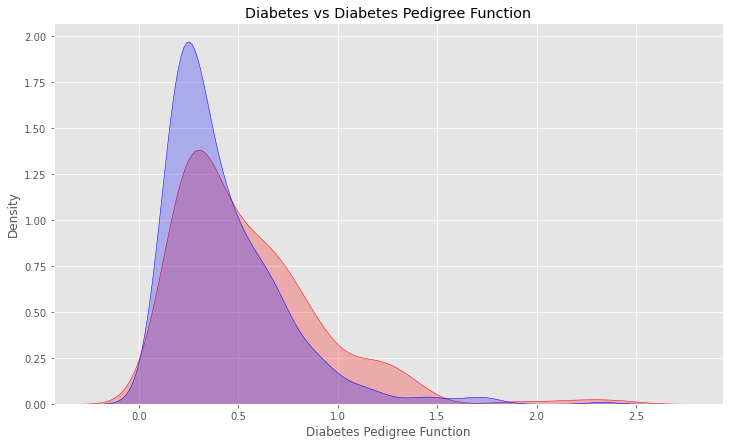

In [25]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['DiabetesPedigreeFunction'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['DiabetesPedigreeFunction'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')

La función pedigrí de la diabetes es una función que puntúa la probabilidad de padecer diabetes basándose en los antecedentes familiares. Proporciona algunos datos sobre la historia de la diabetes mellitus en los familiares y la relación genética de esos familiares con el paciente.

De la gráfica anterior, a medida que la función aumenta las personas diabéticas aumentan, mostrando que la diabetes podría ser hereditaria para ese individuo.

### Diabetes y edad

Text(0.5, 0, 'Edad')

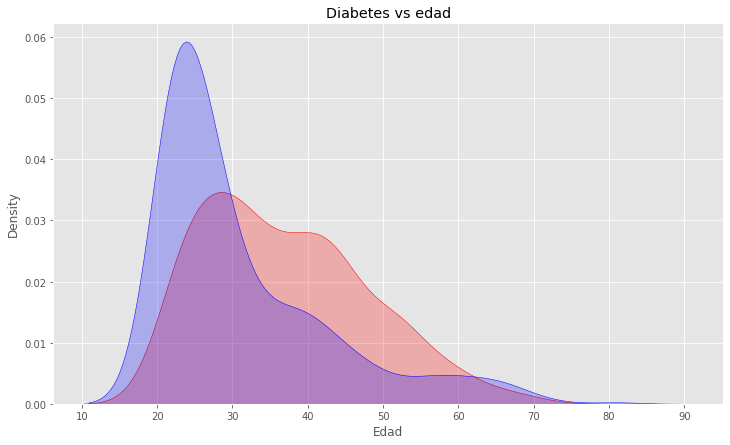

In [26]:
plt.figure(figsize=(12, 7))

sns.kdeplot(new_data_diabetes['Age'], label = "Diabetes", shade = True, color = 'r')
sns.kdeplot(new_data_no_diabetes['Age'], label = "No Diabetes", shade = True, color = 'b')

plt.title('Diabetes vs edad')
plt.xlabel('Edad')

A medida que la persona envejece, corre un alto riesgo de desarrollar diabetes de tipo 2 debido a los efectos combinados del aumento de la resistencia a la insulina y el deterioro de la función de los islotes pancreáticos con el envejecimiento.

En el gráfico anterior, podemos ver que hay más personas sanas en torno a los 20-25 años, pero a medida que la edad aumenta gradualmente también lo hace la gente que es diabética, lo que demuestra que la edad y la diabetes van de la mano.

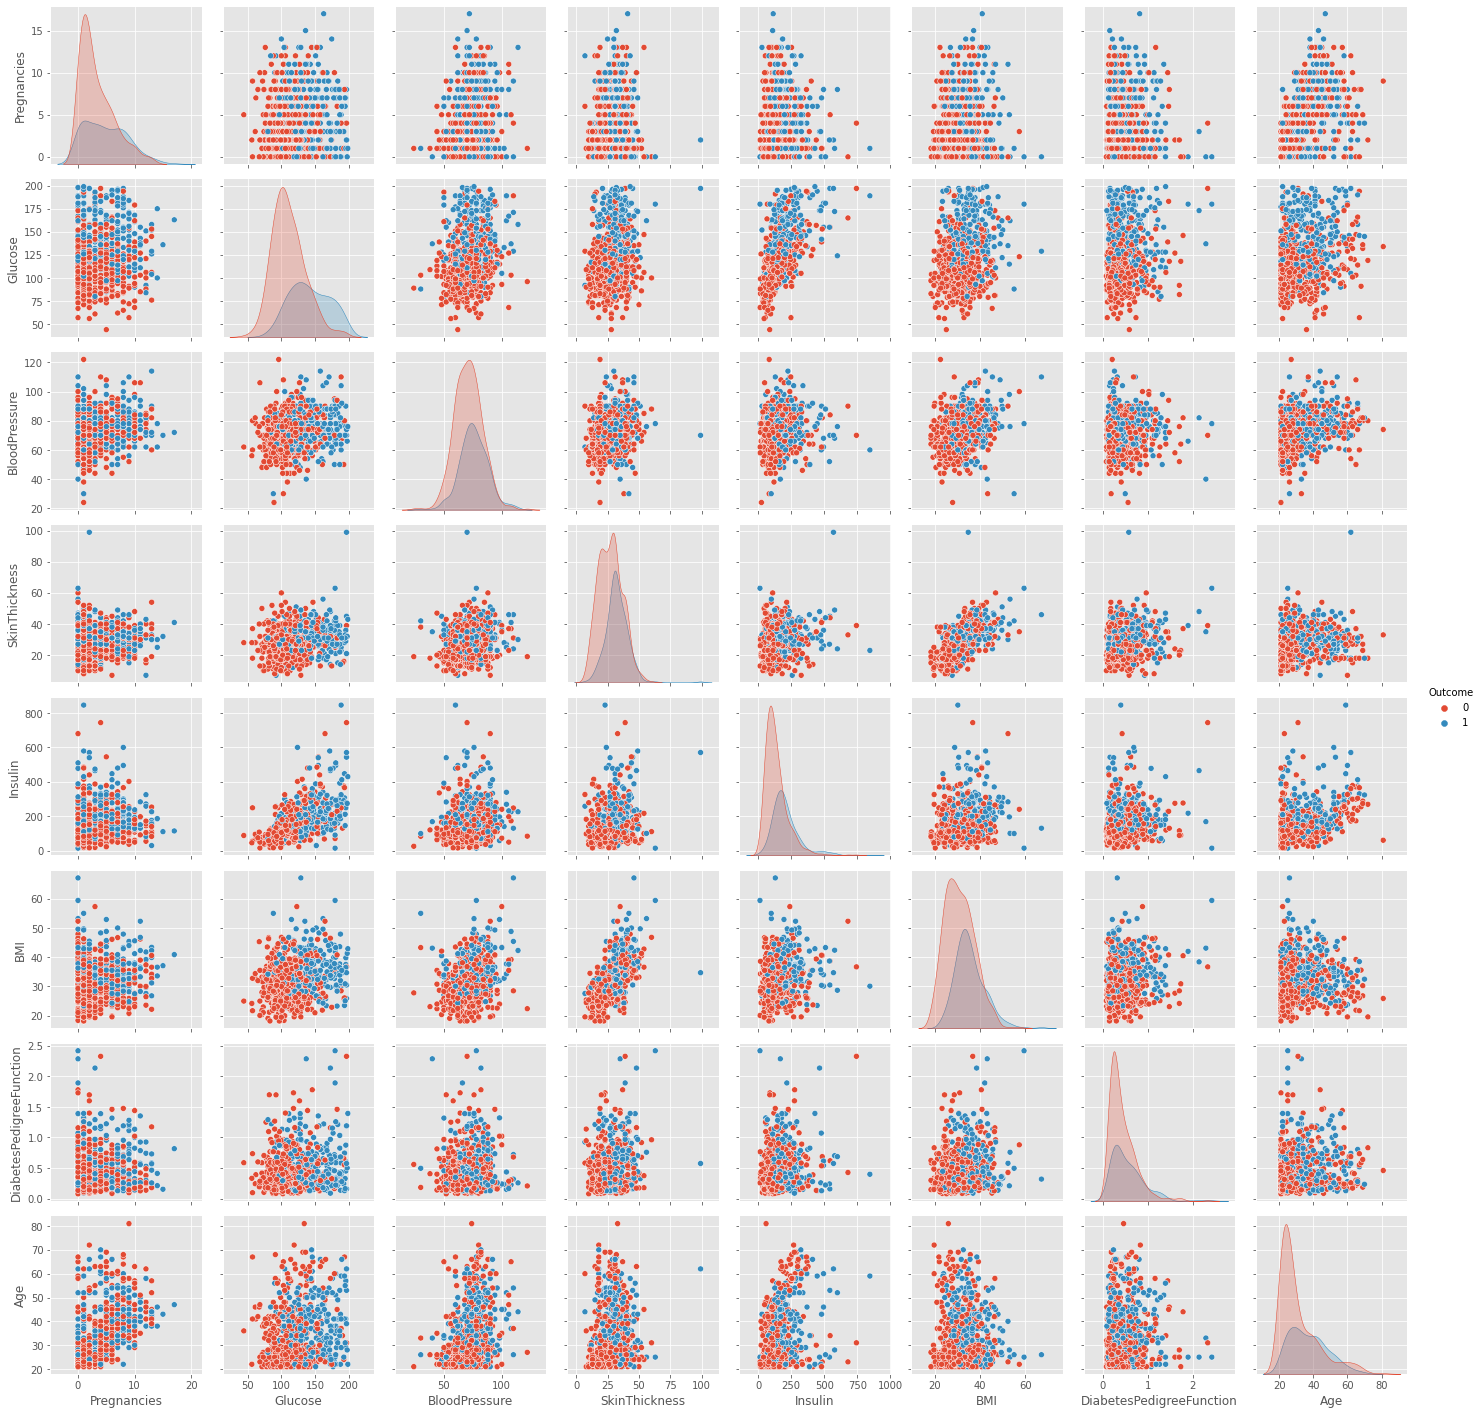

In [27]:
sns.pairplot(data=new_data,hue='Outcome',diag_kind='kde')
plt.show()

## Outliers

Un valor atípico o 'outlier' es una observación que se encuentra a una distancia anormal de otros valores en una muestra aleatoria de una población.

En este cuaderno, estamos utilizando el Box Plot para detectar los valores atípicos de cada característica en nuestro conjunto de datos, donde cualquier punto por encima o por debajo de los bigotes representa un valor atípico. Esto también se conoce como "método univariante", ya que aquí estamos utilizando un análisis de valores atípicos de una variable.

Se representa con la fórmula IQR = Q3 - Q1. Las líneas de código siguientes calculan e imprimen el rango intercuartil para cada una de las variables del conjunto de datos. La salida anterior imprime las puntuaciones IQR, que pueden utilizarse para detectar valores atípicos.

Después de la detección, utilizamos la Imputación de la Mediana para cuidar de los valores atípicos. En esta técnica, reemplazamos los valores extremos con los valores de la mediana. Se aconseja no utilizar los valores medios, ya que se ven afectados por los valores atípicos.

In [28]:
def remove_outliers(data):
    arr=[]
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    
    for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [29]:
new_data['Glucose'] = remove_outliers(new_data['Glucose'])
new_data['BloodPressure'] = remove_outliers(new_data['BloodPressure'])
new_data['SkinThickness'] = remove_outliers(new_data['SkinThickness'])
new_data['Insulin'] = remove_outliers(new_data['Insulin'])
new_data['BMI'] = remove_outliers(new_data['BMI'])
new_data['Pregnancies'] = remove_outliers(new_data['Pregnancies'])
new_data['Age'] = remove_outliers(new_data['Age'])
new_data['DiabetesPedigreeFunction'] = remove_outliers(new_data['DiabetesPedigreeFunction'])

print('Outliers successfully removed')

Outliers successfully removed


In [30]:
new_data.shape

(768, 9)

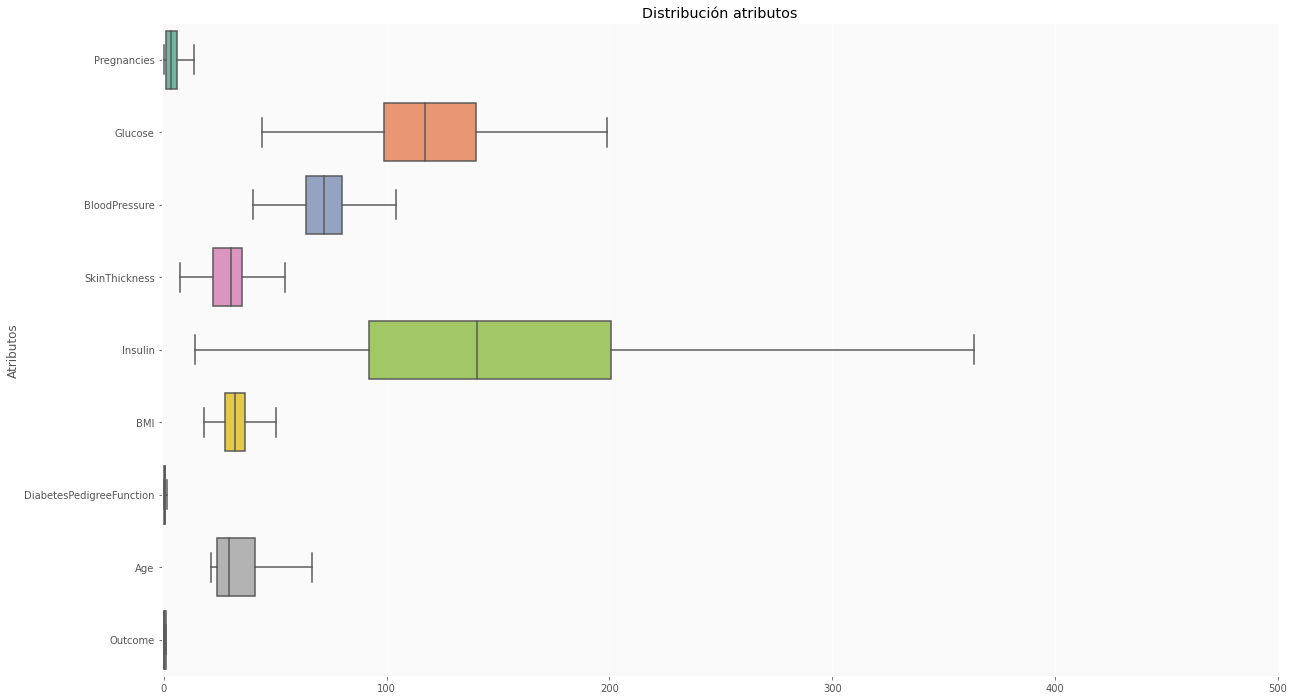

In [31]:
# Después de realizar la eliminación de los outliers, transformandolos en el Q1 o Q2 segun corresponda, podemos observar que la distribución de los datos se ha normalizado

plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(20, 12))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-1, 500))
plt.ylabel('Atributos')
plt.title("Distribución atributos")
ax = sns.boxplot(data = new_data, 
  orient = 'h', 
  palette = 'Set2')

## Correlación de las variables

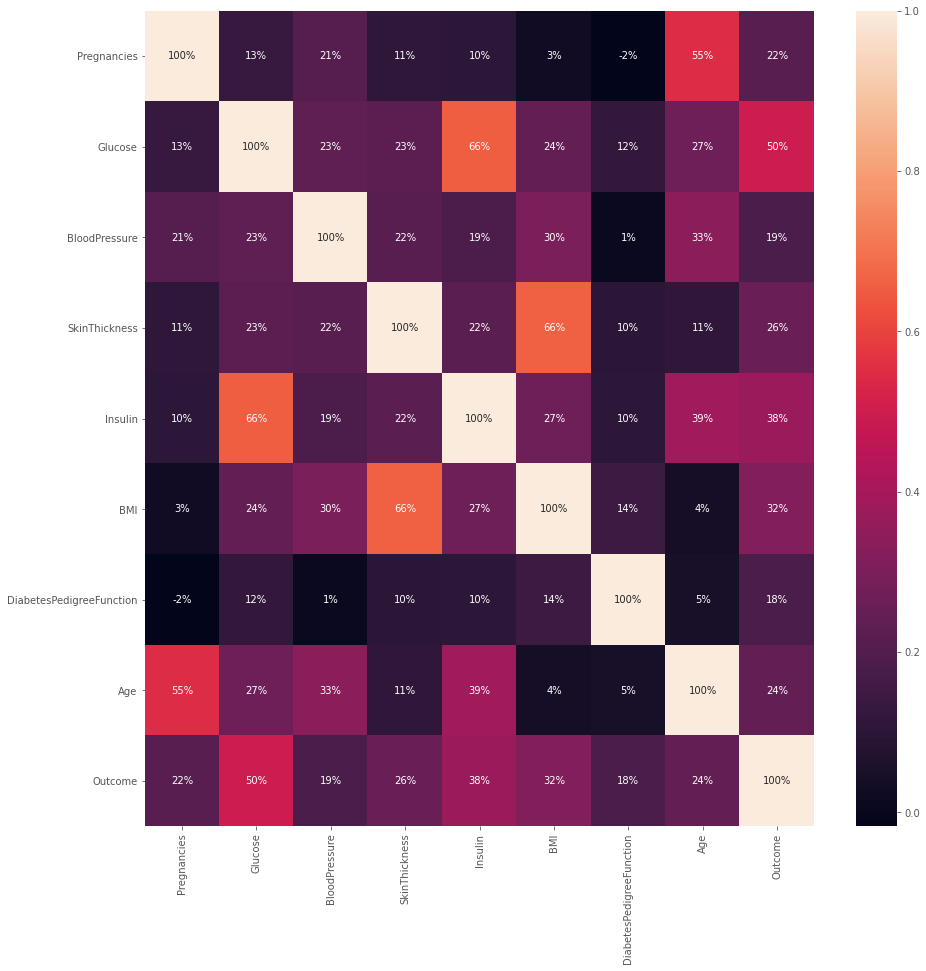

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(new_data.iloc[:, :9].corr(), annot=True, fmt='.0%')

Observando el gráfico de correlación observamos que las únicas características que mantienen un alto índice de correlación son el pliegue de la piel con con el IMC y la variable predictora con el nivel de glucosa en sangre.

## Selección de variables

Para llevar a cabo la elección de las variables mas importantes y correlacionadas utilizamos el modelo Boruta

In [33]:
pip install boruta

     |████████████████████████████████| 61kB 2.7MB/s 


In [34]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [35]:
# Primero definimos las variables

X = new_data.iloc[:, :-1].values
y = new_data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators= 500, n_jobs= -1, class_weight= 'balanced')

feat_selector = BorutaPy(forest, n_estimators= 'auto', verbose= 2)

feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	0
Rejected: 	2


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=34, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F8C2F303050,
                                          verbose=0, warm_star

In [36]:
# Mostramos las características mas importantes

important_features = new_data.columns[:-1][feat_selector.support_].tolist()
important_features

['Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

En la selcción de la variables observamos que se ha rechazado la variable del núemro de embarazos previos y la presión sanguinea

# Modelos

## Balnceado del Dataset

Como hemos podido observar durante el proceso de exploración de los datos hemos podido determinar que nos encontramos delante de un dataset desbalanceado.

Con el objetvio de balancear el mismo y obtener mejores resultados a la hora de aplicar los modelos, procedemos a blanacear el dataset mediante el sistema SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [38]:
X = new_data[important_features]
y = data.iloc[:,-1]

In [39]:
X

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,35.0,171.328751,33.6,0.627,50.0
1,85.0,29.0,59.483383,26.6,0.351,31.0
2,183.0,33.0,197.233948,23.3,0.672,32.0
3,89.0,23.0,94.000000,28.1,0.167,21.0
4,137.0,35.0,168.000000,43.1,1.200,33.0
...,...,...,...,...,...,...
763,101.0,48.0,180.000000,32.9,0.171,63.0
764,122.0,27.0,151.951340,36.8,0.340,27.0
765,121.0,23.0,112.000000,26.2,0.245,30.0
766,126.0,29.0,208.493561,30.1,0.349,47.0


In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [41]:
# Definimos la canalización del proceso de balanceado

over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [42]:
# Transformación del dataset

X_smote, y_smote = pipeline.fit_resample(X, y)

In [43]:
#Comprobamos el balanceado del dataset

num_after = dict(Counter(y_smote))

num_after

{0: 500, 1: 400}

## Transformación de los datos para el modelado

In [44]:
final_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
final_data.columns = ['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
final_data.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,141.0,34.0,128.0,25.4,0.699,24.0,0
1,110.0,29.0,125.0,32.4,0.698,27.0,0
2,118.0,36.0,94.0,33.3,0.261,23.0,0
3,103.0,11.0,82.0,19.4,0.491,22.0,0
4,130.0,23.0,170.0,28.6,0.692,21.0,0


In [45]:
X_new = final_data[important_features]
y_new= final_data.iloc[:,-1]
X_new.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,141.0,34.0,128.0,25.4,0.699,24.0
1,110.0,29.0,125.0,32.4,0.698,27.0
2,118.0,36.0,94.0,33.3,0.261,23.0
3,103.0,11.0,82.0,19.4,0.491,22.0
4,130.0,23.0,170.0,28.6,0.692,21.0


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=40)

In [47]:
# Escalamos las características para aplicar en el modelo

from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [49]:
X_train_scaled

array([[ 1.71512727, -0.21097824,  1.31073678,  0.31992057,  0.85781966,
         1.16331747],
       [ 0.37286564,  1.34242395, -0.90658554,  0.36653587, -0.64201035,
         0.08464714],
       [-1.19817269, -0.35636961, -1.78239975, -0.65784267,  1.08299097,
        -1.057232  ],
       ...,
       [-0.01989394, -1.82865736, -0.69979607, -1.68222121, -0.04544739,
        -1.14506886],
       [-1.06725283, -0.1298638 , -0.97455768, -0.16117429, -1.20263577,
        -0.88155829],
       [-1.09998279, -0.80938122, -0.63494643, -0.82857243,  0.21689656,
        -1.057232  ]])

In [50]:
print("Número de datos x_train: ", X_train.shape)
print("Número de datos y_train: ", y_train.shape)
print("Número de datos x_test: ", X_test.shape)
print("Número de datos y_test: ", y_test.shape)

Número de datos x_train:  (720, 6)
Número de datos y_train:  (720,)
Número de datos x_test:  (180, 6)
Número de datos y_test:  (180,)


## Modelos

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [53]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=0)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=0)])
models.append(['Gradiesnt Boost', GradientBoostingClassifier(random_state=0)])
models.append(['Light GBM', LGBMClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

list_1= []

for m in range(len(models)):
    list_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')

    list_2.append(models[m][0])
    list_2.append((accuracy_score(y_test, y_pred))*100) 
    list_2.append(accuracies.mean()*100)
    list_2.append(accuracies.std()*100)
    list_2.append(roc)
    list_2.append(precision)
    list_2.append(recall)
    list_2.append(f1)
    list_1.append(list_2)

Logistic Regreesion :
[[84 29]
 [18 49]]
Accuracy Score:  0.7388888888888889

K-Fold Validation Mean Accuracy: 74.17 %

Standard Deviation: 4.31 %

ROC AUC Score: 0.74

Precision: 0.63

Recall: 0.73

F1: 0.68
-----------------------------------

SVM :
[[86 27]
 [15 52]]
Accuracy Score:  0.7666666666666667

K-Fold Validation Mean Accuracy: 78.47 %

Standard Deviation: 3.12 %

ROC AUC Score: 0.77

Precision: 0.66

Recall: 0.78

F1: 0.71
-----------------------------------

KNeighbors :
[[80 33]
 [19 48]]
Accuracy Score:  0.7111111111111111

K-Fold Validation Mean Accuracy: 78.06 %

Standard Deviation: 4.92 %

ROC AUC Score: 0.71

Precision: 0.59

Recall: 0.72

F1: 0.65
-----------------------------------

GaussianNB :
[[84 29]
 [19 48]]
Accuracy Score:  0.7333333333333333

K-Fold Validation Mean Accuracy: 75.56 %

Standard Deviation: 4.03 %

ROC AUC Score: 0.73

Precision: 0.62

Recall: 0.72

F1: 0.67
-----------------------------------

BernoulliNB :
[[82 31]
 [18 49]]
Accuracy Score:  

In [54]:
df = pd.DataFrame(list_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [55]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [56]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,Extra Tree,79.444444,81.527778,5.047995,0.796790,0.692308,0.805970,0.744828
10,Light GBM,78.333333,79.583333,5.272292,0.790979,0.670732,0.820896,0.738255
9,Gradiesnt Boost,78.333333,77.777778,5.233734,0.781865,0.684211,0.776119,0.727273
6,Random Forest,77.777778,79.583333,5.795179,0.777440,0.675325,0.776119,0.722222
11,XGBoost,77.222222,78.333333,4.267303,0.769978,0.671053,0.761194,0.713287
1,SVM,76.666667,78.472222,3.121140,0.768591,0.658228,0.776119,0.712329
8,AdaBoost,75.555556,75.833333,3.118048,0.756703,0.645570,0.761194,0.698630
5,Decision Tree,74.444444,73.194444,4.853168,0.750892,0.626506,0.776119,0.693333
0,Logistic Regreesion,73.888889,74.166667,4.312271,0.737353,0.628205,0.731343,0.675862
3,GaussianNB,73.333333,75.555556,4.034955,0.729890,0.623377,0.716418,0.666667


Con la tabla resumen de los diferentes modelos podemos observar que el modelo con mayor precisión es "Extra Tree" pero con valores algo elevados en la curva ROC y la desviación standard.

Procedemos a realizar el tuneado del modelo mediante GridSearch con el objetivo de mejorar la precisión de los modelos

### Tuneado de los modelos

In [59]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1,10,100],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10,15], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1,10,100],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1,10]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200,500],'criterion':['gini','entropy'],'random_state':[0]}]),
               (ExtraTreesClassifier(),[{'n_estimators':[100,150,200,500],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200,500],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,20,500],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (LGBMClassifier(),[{'n_estimators':[100,150,200,500],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [61]:
for i,j in grid_models:
    grid = GridSearchCV(estimator= i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nMejor Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Mejores Parámetros : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
Mejor Accuracy : 74.44%
Mejores Parámetros :  {'C': 10, 'random_state': 0}

----------------

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
Mejor Accuracy : 78.19%
Mejores Parámetros :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
Mejor Accuracy : 79.03%
Mejores P

Con el tunead de los hiperparámetros determinamos que el "Extra tree Classifier" continua siendo el algorítmo con mayor accuracy.

Vemos como se desarrolla

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       113
           1       0.69      0.81      0.74        67

    accuracy                           0.79       180
   macro avg       0.78      0.80      0.79       180
weighted avg       0.81      0.79      0.80       180

ROC AUC score: 0.882578259146744
Accuracy Score:  0.7944444444444444


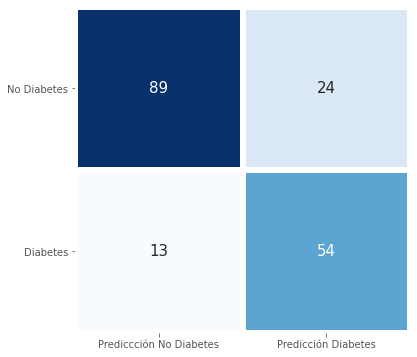

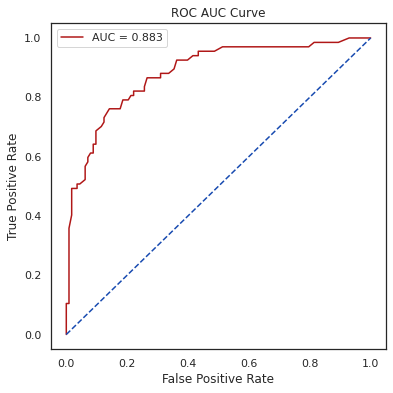

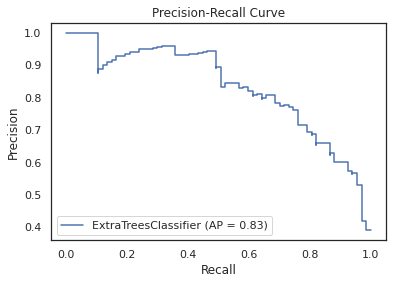

In [62]:
# Extra Tree Classifier

classifier = ExtraTreesClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Diabetes', 'Diabetes'], xticklabels = ['Prediccción No Diabetes', 'Predicción Diabetes'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

# Conclusiones

Después de realizar un extenso análisis de los datos y aplicar diferentes modelos y tunear los mismos mediante Grid Search, hemos observado que el modelo que mejor se adapta es el Extra Tree Classifier.